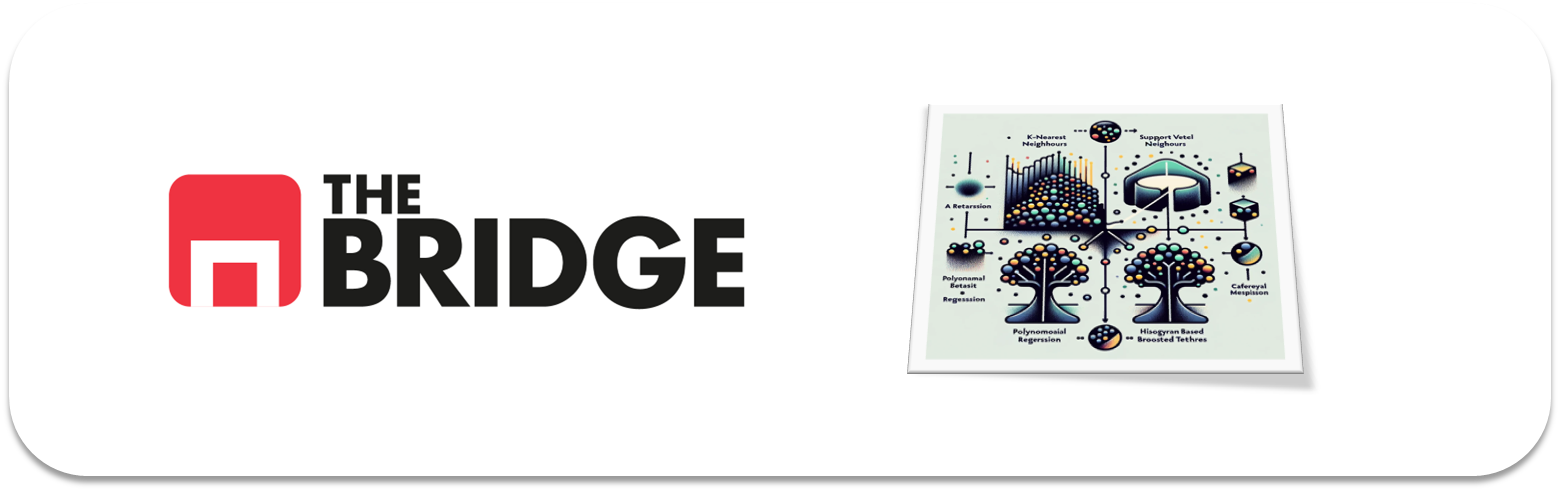

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *
from toolbox_ML import *

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [4]:
df = pd.read_csv('./data/wines_dataset.csv', sep='|')

In [5]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
4425,6.5,0.18,0.34,1.6,0.040,43.0,148.0,0.99120,3.32,0.59,11.5,8,white
3670,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5,red
2693,7.2,0.60,0.04,2.5,0.076,18.0,88.0,0.99745,3.53,0.55,9.5,5,red
3422,6.5,0.21,0.40,7.3,0.041,49.0,115.0,0.99268,3.21,0.43,11.0,6,white
4173,11.6,0.32,0.55,2.8,0.081,35.0,67.0,1.00020,3.32,0.92,10.8,7,red


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


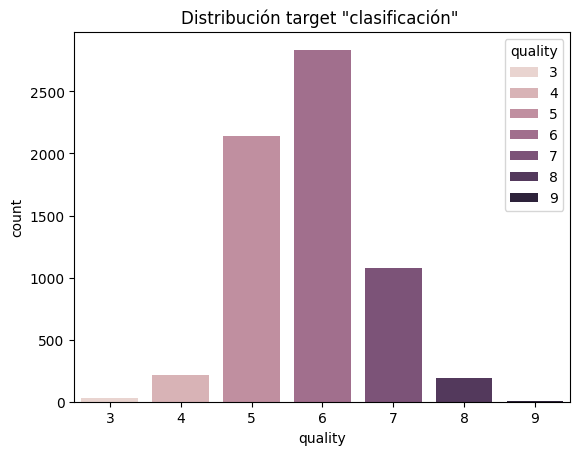

In [9]:
# clasificación
sns.countplot(df, x='quality', hue='quality')
plt.title('Distribución target "clasificación" ');

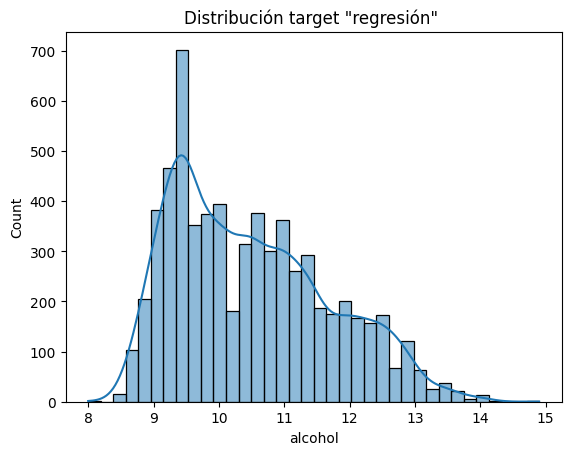

In [13]:
# regresión
sns.histplot(df, x='alcohol', kde=True)
plt.title('Distribución target "regresión" ');

In [ ]:
# vamos a pasarla a numerica

In [37]:
df['class'].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

In [38]:
df['class'] = df['class'].map({'white':0, 'red':1})

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [67]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [41]:
X = df.drop(columns = 'quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


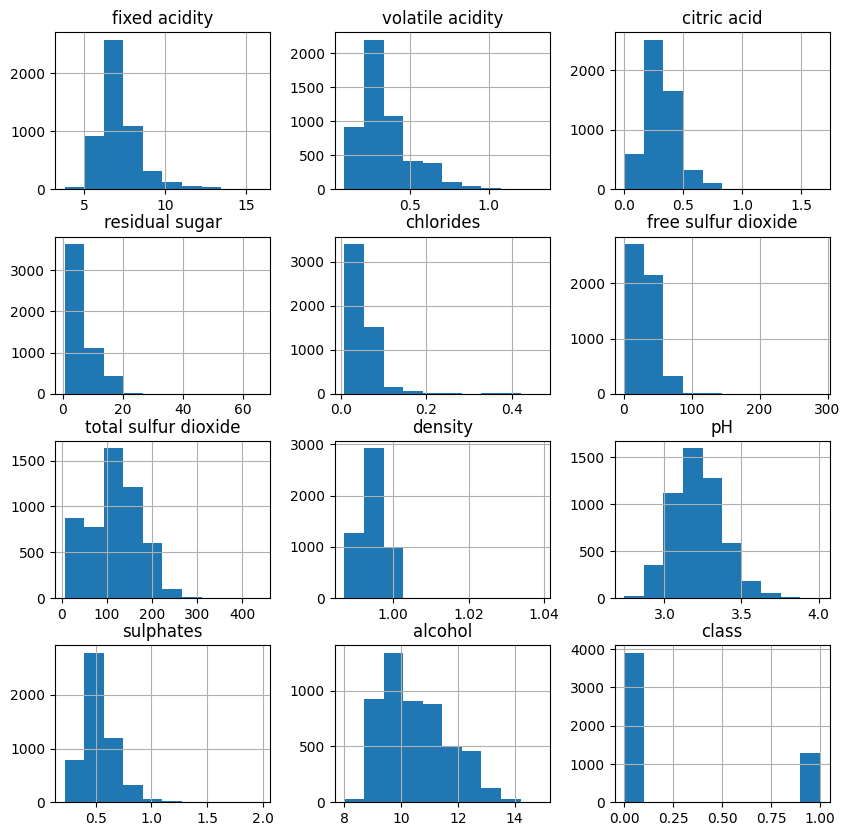

In [43]:
X_train.hist(figsize=(10,10));

In [22]:
# voy a centrar los datos y escalarlos porque para KNN es sensible

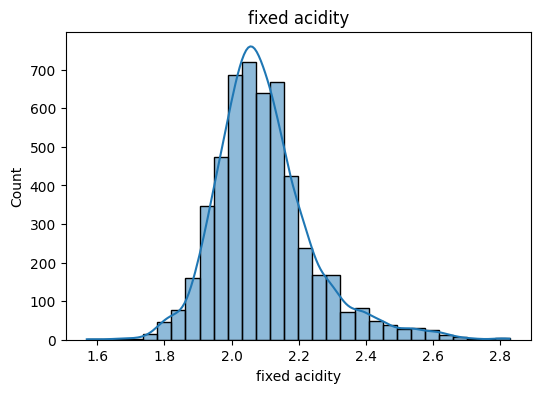

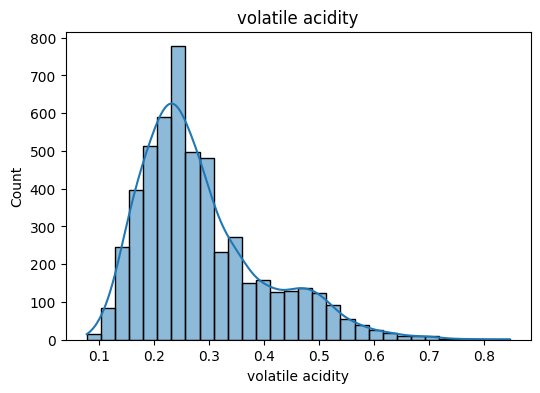

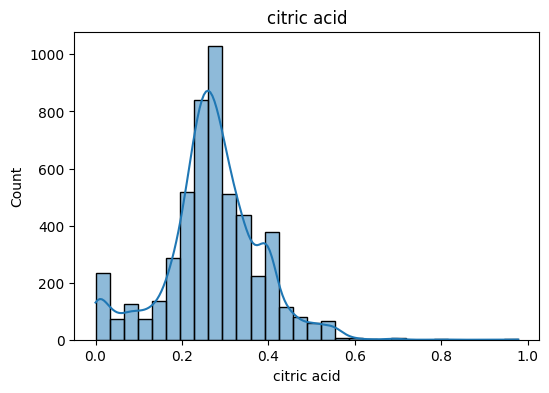

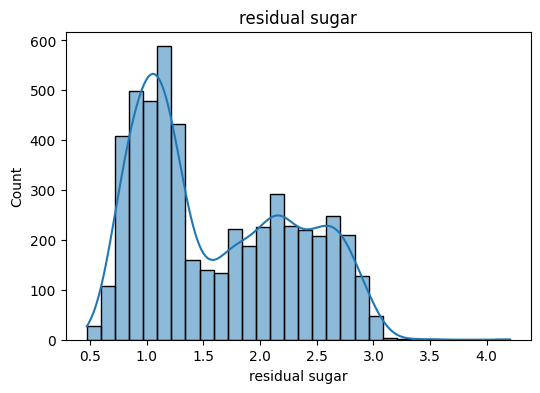

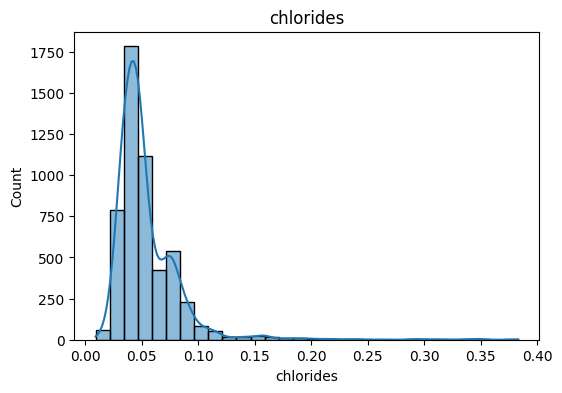

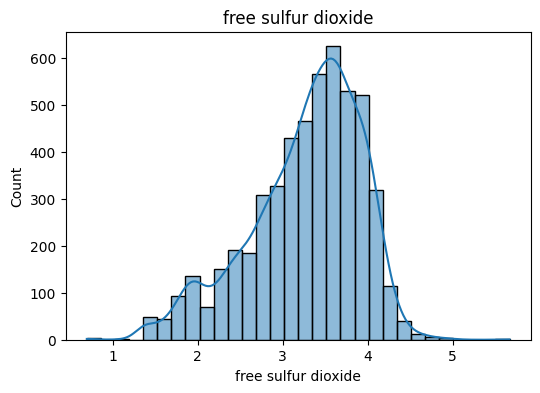

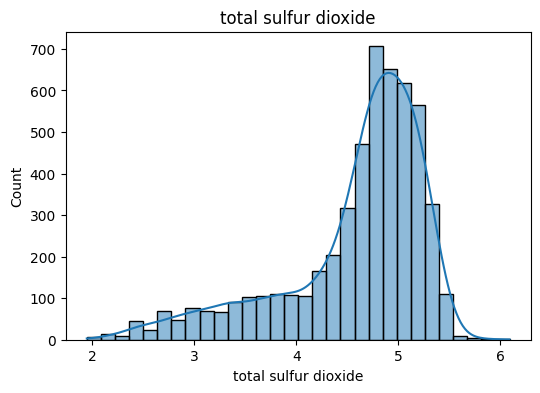

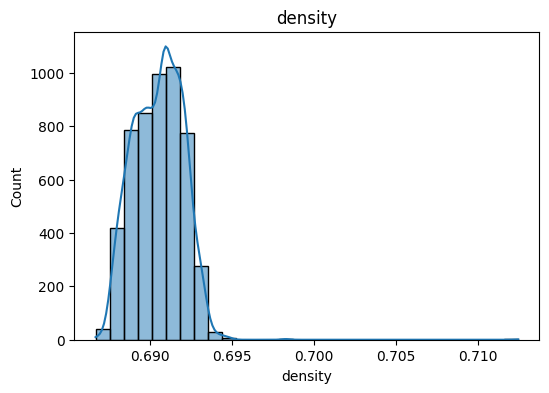

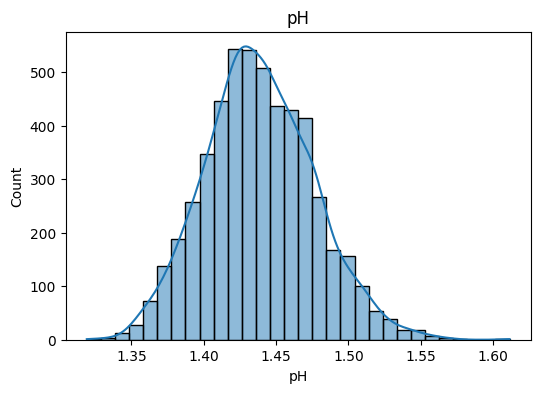

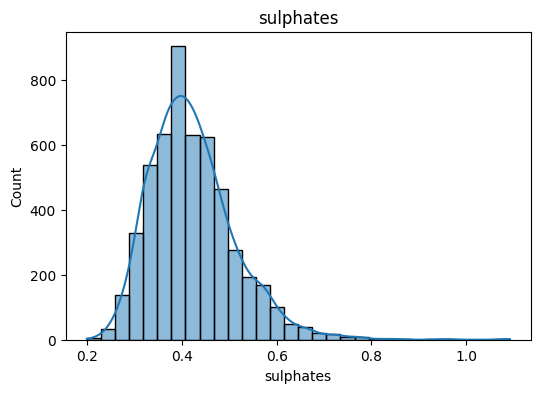

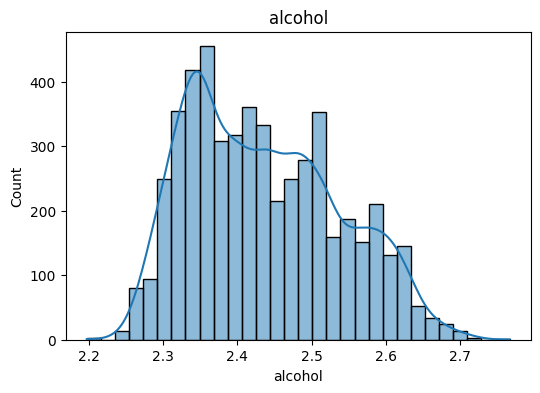

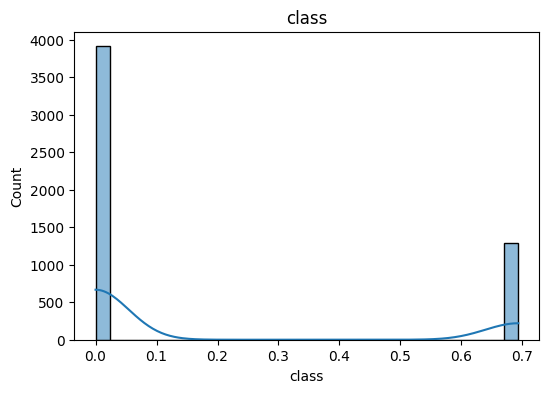

In [44]:
# voy a probar antes del centrado definitivo

for x in X_train.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(np.log1p(X_train[x]), bins=30, kde=True)
    plt.title(x)
    plt.show()

In [46]:
no_log = ['total sulfur dioxide', 'density', 'volatile acidity', 'class']

In [47]:
X_train_mod = X_train.copy()

columnas = [col for col in X_train.columns if col not in no_log]
X_train_mod[columnas] = np.log1p(X_train_mod[columnas])

In [48]:
#hacemos lo mismo con los datos de test
X_test_mod = X_test.copy()

X_test_mod[columnas] = np.log1p(X_test_mod[columnas])

In [51]:
# Vamos a escalar los datos de train y test
scaler = StandardScaler()
X_train_mod = scaler.fit_transform(X_train_mod)
X_test_mod = scaler.transform(X_test_mod)

In [56]:
# Como son notas del vino, voy a reducir las notas en 3 grupos:
# 3,4,5 -> aceptable (0)
# 6,7 -> buena (1)
# 8,9 -> excelente (2)

In [55]:
df['alcohol'].value_counts()

alcohol
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
13.566667      1
9.233333       1
9.750000       1
9.050000       1
11.433333      1
Name: count, Length: 111, dtype: int64

In [57]:
y_train = y_train.apply(lambda x: 0 if x <= 5 else (1 if x <= 7 else 2))

In [58]:
y_test = y_test.apply(lambda x: 0 if x <= 5 else (1 if x <= 7 else 2))

In [68]:
KNN = KNeighborsClassifier()
rforest = RandomForestClassifier(max_depth= 5, random_state = 42)
lgbm = LGBMClassifier(max_depth= 5, random_state = 42)

In [69]:
# baseline
k = [3,5]
for x in k:
    modelo = KNeighborsClassifier(n_neighbors=x)
    resultado = np.mean(cross_val_score(modelo, X_train_mod, y_train, cv=5))
    print(x, resultado)

3 0.7107953283482639
5 0.7090647442067077


In [64]:
# usaremos con K=3

In [78]:
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN5 = KNeighborsClassifier(n_neighbors=5)
nombres = ['knn3', 'knn5', 'random forest', 'lightgbm']
modelos = [KNN3,KNN5, rforest, lgbm]

In [79]:
metricas = {}
for nombre, modelo in zip(nombres, modelos):
    if nombre == 'knn':
        validacion  = cross_validate(modelo, X_train_mod, y_train, cv=5, scoring= ['accuracy', 'balanced_accuracy', 'recall_macro', 'f1_macro'])
    else:
        validacion  = cross_validate(modelo, X_train, y_train, cv=5, scoring= ['accuracy', 'balanced_accuracy', 'recall_macro', 'f1_macro'])
    metricas[nombre] = {
        'accuracy' : np.mean(validacion['test_accuracy']),
        'balanced_accuracy' : np.mean(validacion['test_balanced_accuracy']),
        'recall_macro' : np.mean(validacion['test_recall_macro']),
        'f1_macro' : np.mean(validacion['test_f1_macro'])
    }

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score -1.002799
[LightGBM] [Info] Start training from score -0.506106
[LightGBM] [Info] Start training from score -3.496267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [80]:
metricas

{'knn3': {'accuracy': np.float64(0.6547978825794033),
  'balanced_accuracy': np.float64(0.47422956565907165),
  'recall_macro': np.float64(0.47422956565907165),
  'f1_macro': np.float64(0.49141323448093377)},
 'knn5': {'accuracy': np.float64(0.6422901088324572),
  'balanced_accuracy': np.float64(0.4562522581675852),
  'recall_macro': np.float64(0.4562522581675852),
  'f1_macro': np.float64(0.475708356370362)},
 'random forest': {'accuracy': np.float64(0.7236927148885763),
  'balanced_accuracy': np.float64(0.4757645845683027),
  'recall_macro': np.float64(0.4757645845683027),
  'f1_macro': np.float64(0.4735338317680212)},
 'lightgbm': {'accuracy': np.float64(0.763902235877693),
  'balanced_accuracy': np.float64(0.5710332171363399),
  'recall_macro': np.float64(0.5710332171363399),
  'f1_macro': np.float64(0.6065750605052658)}}

In [81]:
metricas_comparacion = pd.DataFrame(metricas)

In [82]:
metricas_comparacion.T

,accuracy,balanced_accuracy,recall_macro,f1_macro
knn3,0.654798,0.474230,0.474230,0.491413
knn5,0.642290,0.456252,0.456252,0.475708
random forest,0.723693,0.475765,0.475765,0.473534
lightgbm,0.763902,0.571033,0.571033,0.606575


In [83]:
# Voy a elegir lightgbm porque es mas grande en recall_macro, sino tiraria por el random forest que también esta igualado

In [5]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {
    'max_depth' : [3,5,7,9],
    'n_estimators' : [1,3,5,7],
    'learning_rate' : [0.01, 0.5, 1, 1.5],
    'verbosity' : [-1],
    'num_leaves' : [10,20,30],
    'num_iterations' : [100,300,500]
}

grid = GridSearchCV(
    lgbm,
    param_grid=param_grid,
    cv=5,
    scoring = 'recall_macro',
    n_jobs = -1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.5, 1, 1.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [1, 3, 5, 7],
                         'num_iterations': [100, 300, 500],
                         'num_leaves': [10, 20, 30], 'verbosity': [-1]},
             scoring='recall_macro')

In [89]:
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 7,
 'n_estimators': 1,
 'num_iterations': 300,
 'num_leaves': 20,
 'verbosity': -1}

In [91]:
estimators = grid.best_estimator_
pred_train = estimators.predict(X_train)
pred_test = estimators.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [93]:
print('Report para TEST')
print(classification_report(y_test, pred_test))

Report para TEST
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       477
           1       0.80      0.87      0.83       783
           2       0.81      0.33      0.46        40

    accuracy                           0.79      1300
   macro avg       0.80      0.63      0.68      1300
weighted avg       0.79      0.79      0.79      1300



In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

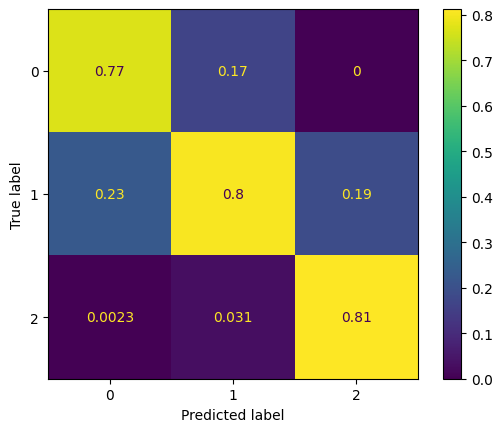

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, normalize='pred');

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('./data/wines_dataset.csv', sep='|')

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [13]:
df['class'] = df['class'].map({'white':0, 'red':1})

In [14]:
Xreg = df.drop(columns = 'alcohol')
yreg = df['alcohol']

X_train, X_test, y_train, y_test = train_test_split(Xreg, yreg, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

r_forest = RandomForestRegressor(max_depth = 10, random_state= 42)
xgb = XGBRegressor(max_depth = 10, random_state= 42)
lgb = LGBMRegressor(max_depth = 10, random_state= 42)

In [101]:
# estos modelos no necesitan de escalado de datos

In [17]:
modelos = {
    'random forest' : r_forest,
    'xgboost' : xgb,
    'light gbm' : lgb
}

result = {}

for nombre, modelo in modelos.items():
    cross = cross_validate(modelo, X_train, y_train, cv=5, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
    result[nombre] = {
        'mae' : -np.mean(cross['test_neg_mean_absolute_error']),
        'rmse' : np.sqrt(-np.mean(cross['test_neg_mean_squared_error'])),
        'r2' : np.mean(cross['test_r2'])
    }

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score 10.500495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1417
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score 10.475591
[LightGBM] [Warni

In [18]:
result

{'random forest': {'mae': np.float64(0.32316445004374195),
  'rmse': np.float64(0.4367539283342923),
  'r2': np.float64(0.8659928723955996)},
 'xgboost': {'mae': np.float64(0.2579141124670481),
  'rmse': np.float64(0.4035271255110142),
  'r2': np.float64(0.8856676270235864)},
 'light gbm': {'mae': np.float64(0.2820208900993424),
  'rmse': np.float64(0.38627536253979694),
  'r2': np.float64(0.8952068469849488)}}

In [21]:
result = pd.DataFrame(result)
result

,mae,rmse,r2
random forest,0.323164,0.436754,0.865993
xgboost,0.257914,0.403527,0.885668
light gbm,0.282021,0.386275,0.895207


In [109]:
# me quedo con light gbm como el anterior, tiene el menor RMSE y el r2 mas grande, luego el MAE sería el segundo mas pequeño

In [33]:
param = {
    'max_depth' : [3,5,7,9],
    'n_estimators' : [1,3,5,7],
    'learning_rate' : [0.01, 0.5, 1, 1.5],
    'verbosity' : [-1],
    'num_leaves' : [10,20,30],
    'num_iterations' : [100,300,500]
}

grid_ = GridSearchCV(
    lgb,
    param_grid=  param,
    cv=5,
    n_jobs = -1,
    scoring = 'neg_mean_squared_error'
)

grid_.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.5, 1, 1.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [1, 3, 5, 7],
                         'num_iterations': [100, 300, 500],
                         'num_leaves': [10, 20, 30], 'verbosity': [-1]},
             scoring='neg_mean_squared_error')

In [34]:
grid_.best_params_

{'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 1,
 'num_iterations': 500,
 'num_leaves': 10,
 'verbosity': -1}

In [35]:
estim = grid_.best_estimator_
pred = estim.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [37]:
print("MAE:", mean_absolute_error(y_test, pred))
print("RSME:", np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.2588945332830462
RSME: 0.3819341536946612


In [38]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

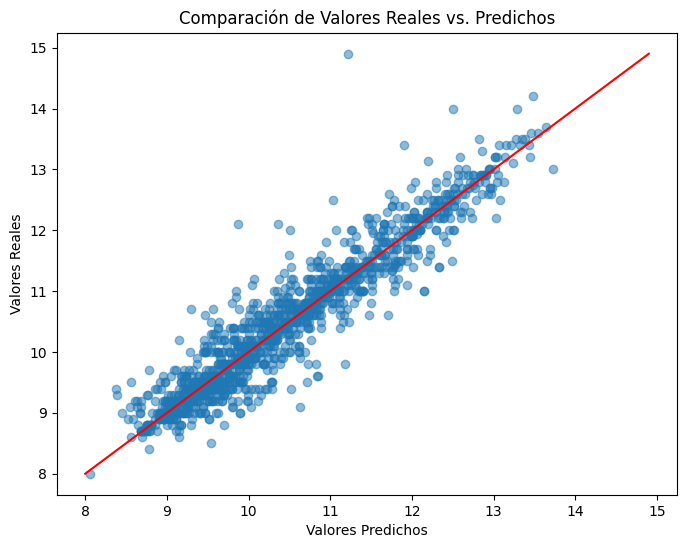

In [39]:
plot_predictions_vs_actual(y_test, pred)